In [1]:
# %matplotlib Qt
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from modules import KNN

- <p style="color: yellow; font-size: 24px; font-family: Tahoma">Breast Cancer dataset</p>

In [5]:
breast_data = load_breast_cancer()
x = breast_data.data
y = breast_data.target

- <p style="color: yellow; font-size: 18px; font-family: Tahoma">Split dataset to train and test datasets (%80 for train and %20 for test).</p>


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

<ul><li> <p style="color: yellow; font-size: 18px; font-family: Tahoma">Train with My KNN:⬇</p></li>
<ul><li><span style="color: yellow; font-size: 14px; font-family: Tahoma">Evaluate with: </span><span style="color: green; font-family: Tahoma; font-size: 12px;"> k=1, 3, 5, ...</span></li></ul>
</ul>

In [7]:
df = pd.DataFrame()
k, my_accuracy = [], []

for i in range(1, 9, 2):
    knn = KNN(i)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    
    k.append(i)
    my_accuracy.append(accuracy)

df['k'] = k
df['my_accuracy'] = my_accuracy

df

,k,my_accuracy
0,1,0.894737
1,3,0.894737
2,5,0.929825
3,7,0.921053


<ul><li> <p style="color: yellow; font-size: 18px; font-family: Tahoma">Train with ScikitLearn KNeighborsClassifier:⬇</p></li>
<ul><li><span style="color: yellow; font-size: 14px; font-family: Tahoma">Evaluate with: </span><span style="color: green; font-family: Tahoma; font-size: 12px;"> k=1, 3, 5, ...</span></li></ul>
</ul>

In [8]:
df = pd.DataFrame()
k, sk_accuracy = [], []

for i in range(1, 9, 2):
    sk_knn = KNeighborsClassifier(i)
    sk_knn.fit(x_train, y_train)
    accuracy = sk_knn.score(x_test, y_test)
    
    k.append(i)
    sk_accuracy.append(accuracy)

df['k'] = k
df['sk_accuracy'] = sk_accuracy

df

,k,sk_accuracy
0,1,0.894737
1,3,0.894737
2,5,0.929825
3,7,0.921053


- <p style="color: yellow; font-size: 18px; font-family: Tahoma">Calculate and show confusion matrix</p>


In [9]:
my_knn = KNN(3)
my_knn.fit(x_train, y_train)
y_pred = my_knn.predict(x_test)

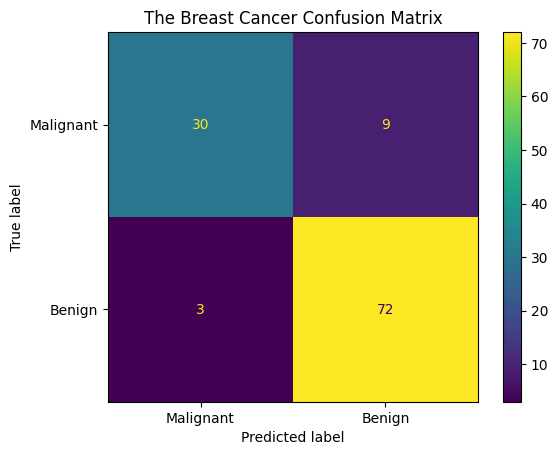

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(cm, display_labels=['Malignant', 'Benign'])
cm.plot()
plt.title('The Breast Cancer Confusion Matrix')
plt.show()